In [225]:
import numpy as np
from scipy import signal

import soundfile as sf
import IPython.display as ipd

import matplotlib.pyplot as plt
from funcs import plot_settings

In [226]:
plot_settings()

In [227]:
def adaptrls(x, d, p, Lambda, alpha):
    N = len(x)
    w = np.zeros(p)
    R = np.eye(p) * alpha 
    e = np.zeros(N) 

    for i in range(p, N):
        x_i = np.flip(x[max(0, i-p+1):i+1], axis=0)
        # print(x_i.shape, w.shape)
        y_i = np.dot(w, x_i)

        e[i] = d[i] - y_i

        k = np.dot(R, x_i) / (Lambda + np.dot(np.dot(x_i, R), x_i))

        w += k * e[i]

        R = (R - np.outer(k, np.dot(x_i, R))) / Lambda 

    return w, e


In [228]:
p = 16

h = np.random.random((p, ))*10
x = np.random.random((1000, ))*10

sigma = 1e-4

d = signal.lfilter(h, 1, x) + np.random.normal(0, sigma, len(x))

In [229]:
w, e = adaptrls(x, d, p, 0.95, 1e5)

In [230]:
print(f"Относительная ошибка весов:{max(abs(w-h))/h}")

Относительная ошибка весов:[3.97379847e-06 3.73142683e-04 5.60143151e-06 2.15320259e-06
 1.63165984e-05 2.60572720e-06 4.16546087e-06 4.19587946e-06
 2.11343330e-06 2.77330937e-06 2.93328013e-04 2.72638218e-06
 1.20986256e-05 3.19420863e-06 6.48065009e-06 2.24481114e-06]


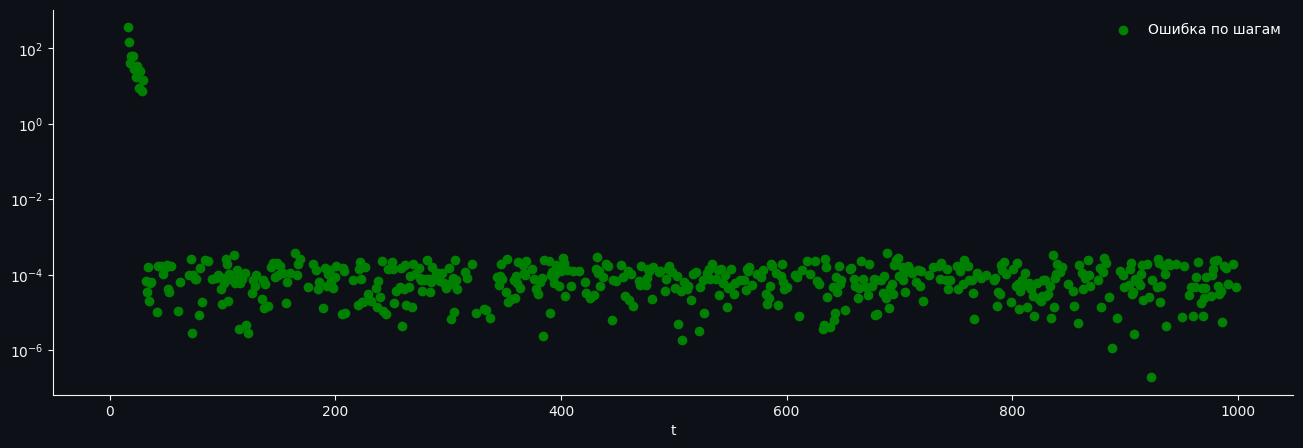

In [231]:
plt.rcParams["figure.figsize"] = (16,5)
plt.scatter(range(len(e)), e, label="Ошибка по шагам")
plt.xlabel("t")
plt.yscale("log")
plt.legend()

In [232]:
h = np.random.random((16, ))*10

x = np.random.random((1000, ))*10

def experiment(sigma=1e-3, p=16, Lambda=0.95):
    d = signal.lfilter(h, 1, x) + np.random.normal(0, sigma, len(x))
    w, e = adaptrls(x, d, p, Lambda, 1e5)

    plt.scatter(range(len(e)), e, label="Ошибка по шагам")
    plt.xlabel("t")
    plt.yscale("log")
    plt.title(f"h=16, p={p}, $\sigma$={sigma}, $\lambda$={Lambda}")
    plt.legend()
    return w, e
    

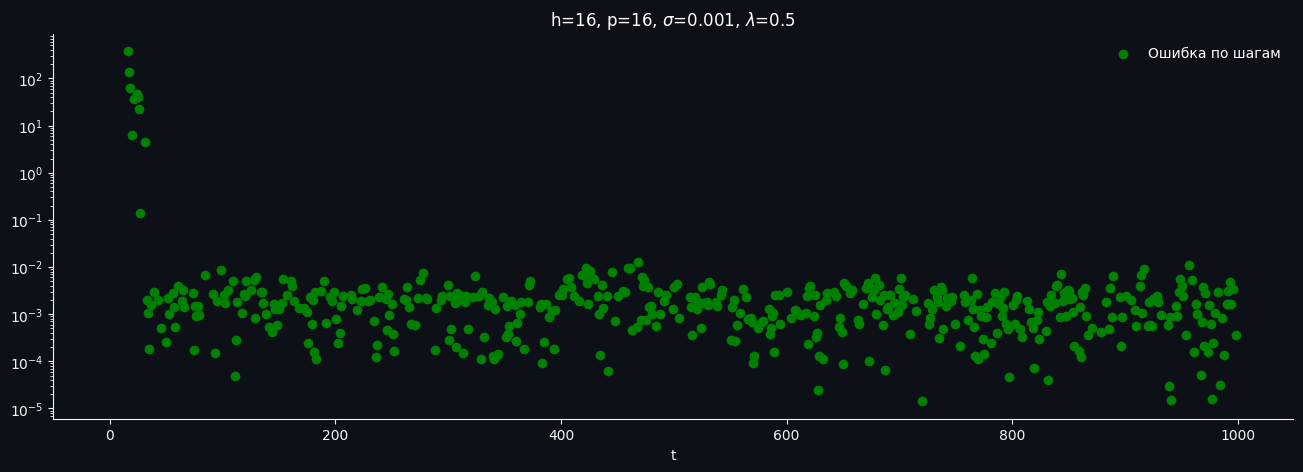

In [233]:
w, e = experiment(1e-3, 16, 0.5)

(array([0.72256057, 0.37617577, 2.84911653, 3.9281409 , 7.61766835,
        0.97241233, 5.9494199 , 7.53299232, 9.63950654, 5.16776993,
        1.54021425, 6.22760163, 7.96860875, 6.62650194, 8.70947718,
        9.3190559 ]),
 array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         3.77063227e+02,  1.38793475e+02,  6.11715292e+01, -2.05394324e+01,
         6.35565058e+00, -7.81878526e+00,  3.73469368e+01, -3.81925350e+00,
         4.60174234e+01,  4.12499703e+01,  2.25730949e+01,  1.42342775e-01,
        -4.16686947e+01, -2.46934781e+01, -7.97665156e+00,  4.40341769e+00,
        -4.73721190e-03,  1.59883690e-03, -1.51205977e-03,  2.49782928e-03,
         1.93792557e-03, -5.54832807e-04,  4.27817031e-04, -2.20733709e-03,
        -1.873

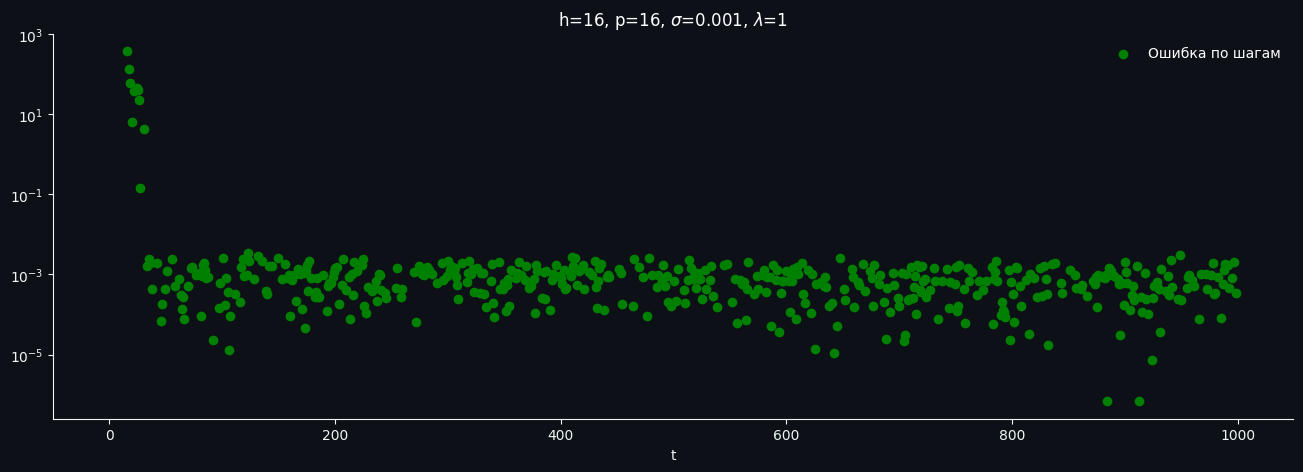

In [234]:
experiment(1e-3, 16, 1)

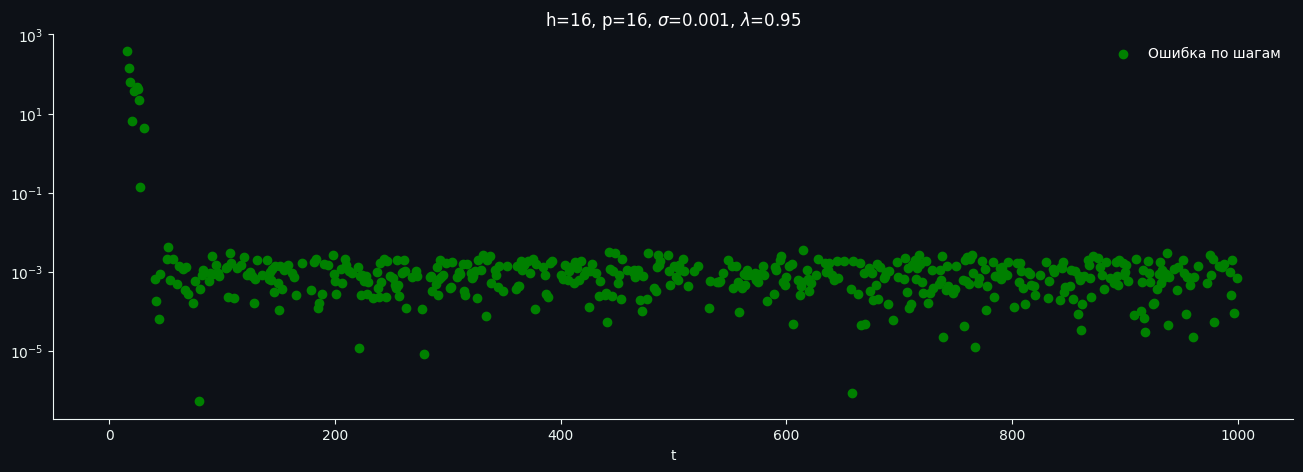

In [235]:
w, e = experiment(1e-3, 16, 0.95)

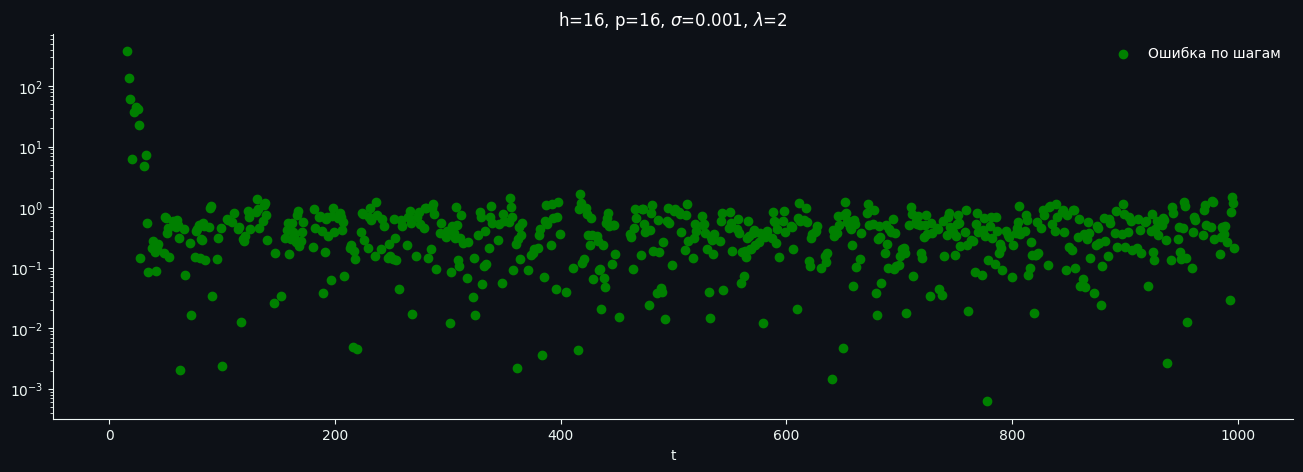

In [236]:
w, e = experiment(1e-3, 16, 2)

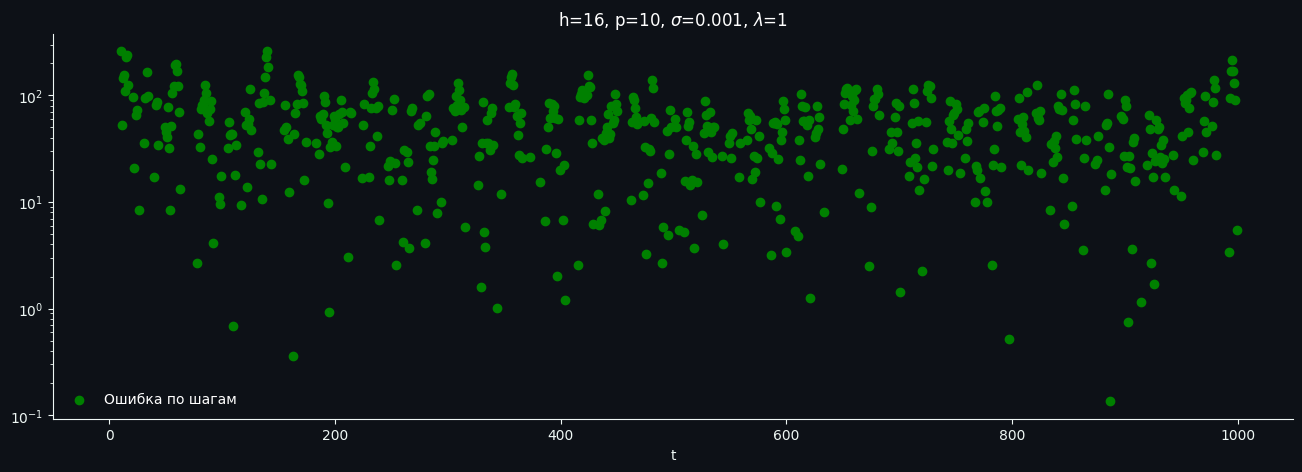

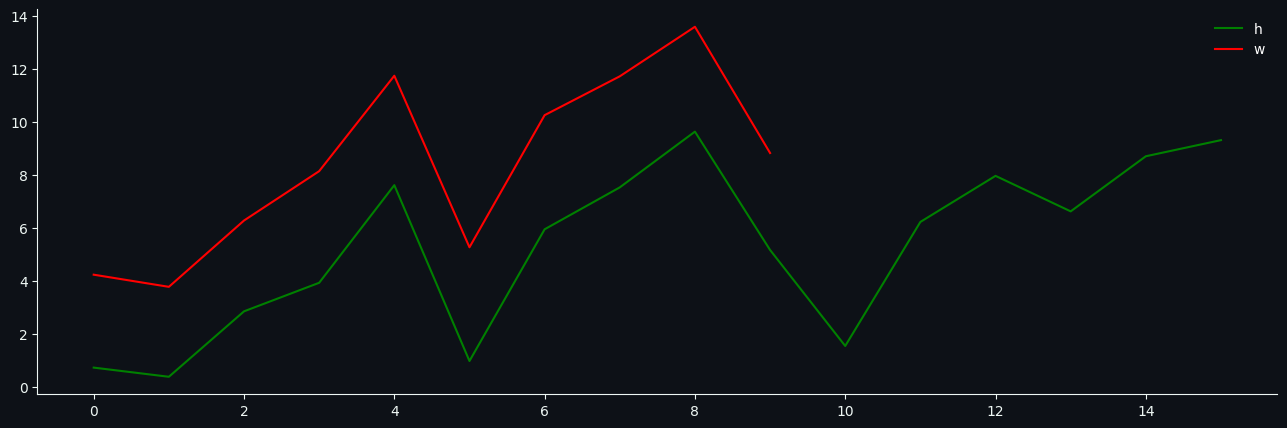

In [237]:
w, e = experiment(1e-3, 10, 1)
plt.show()
plt.plot(h, label='h')
plt.plot(w, label='w')
plt.legend()

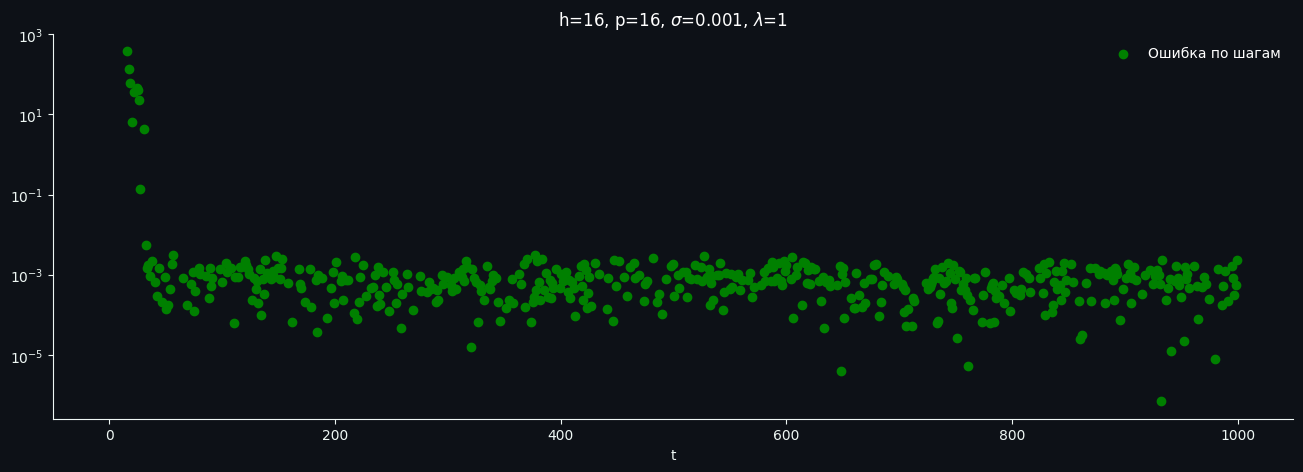

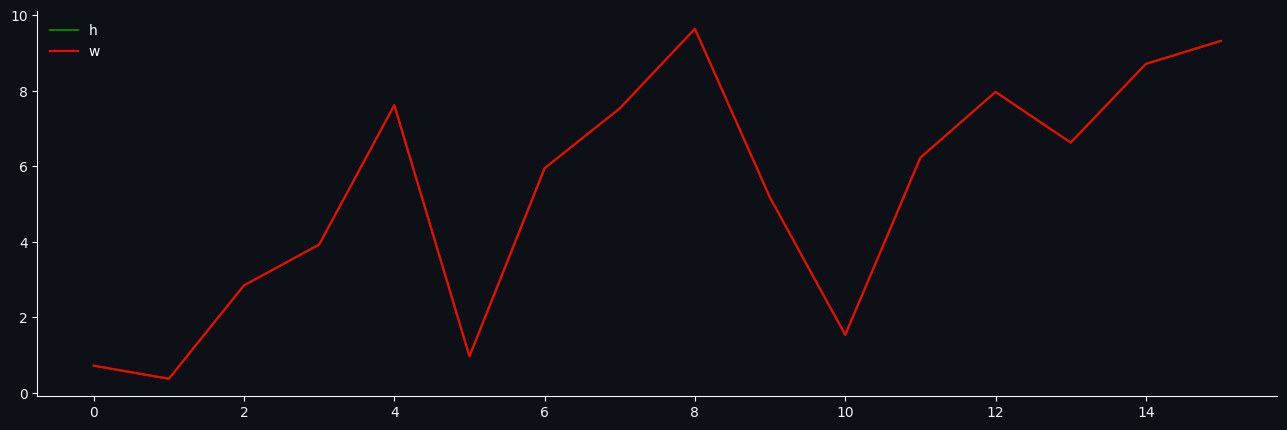

In [238]:
w, e = experiment(1e-3, 16, 1)
plt.show()
plt.plot(h, label='h')
plt.plot(w, label='w')
plt.legend()

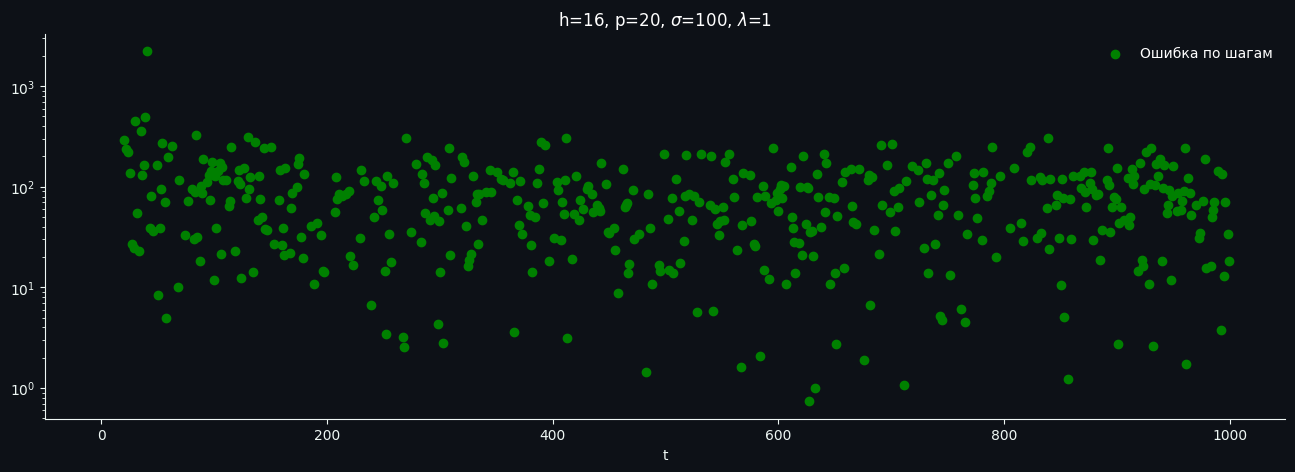

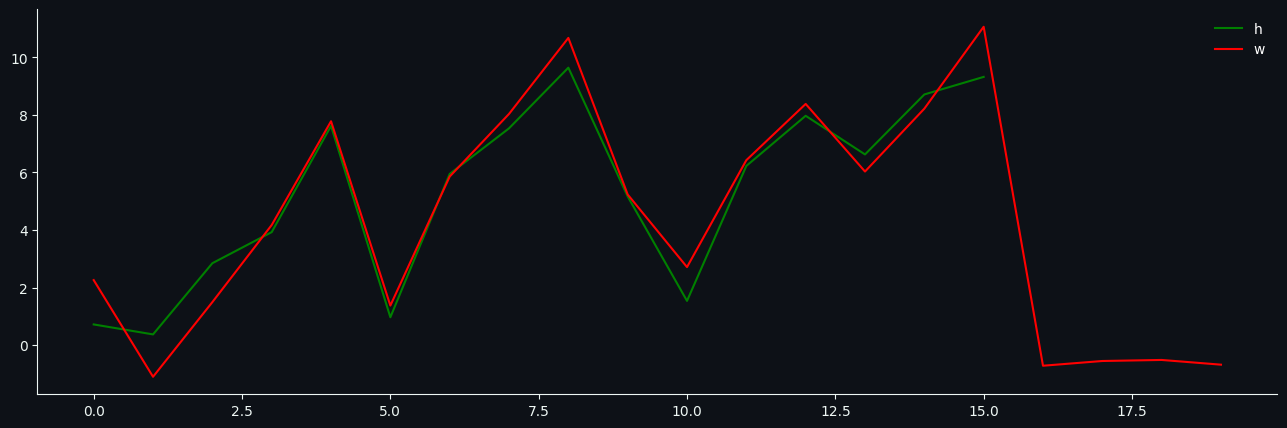

In [239]:
w, e = experiment(100, 20, 1)
plt.show()
plt.plot(h, label='h')
plt.plot(w, label='w')
plt.legend()

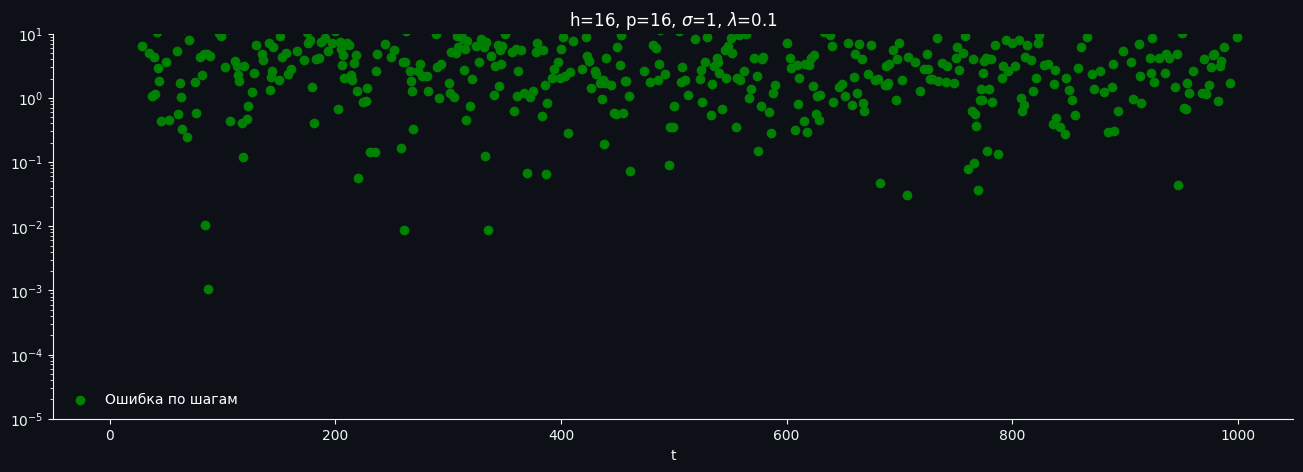

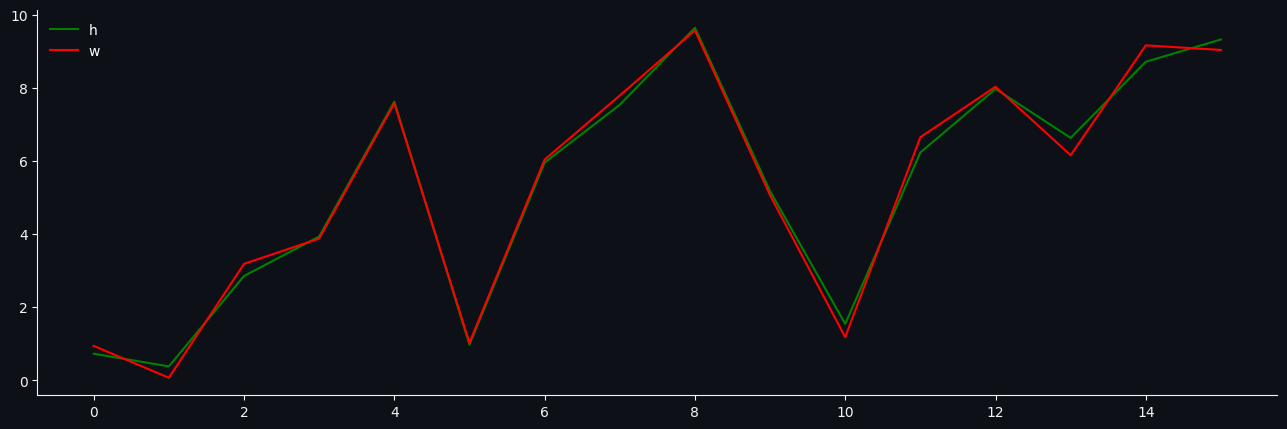

In [240]:
h1 = np.random.random((16, ))*10
h2 = np.random.random((16, ))*10

x = np.random.random((1000, ))*10
d = [*signal.lfilter(h, 1, x[:len(x)//2]), *signal.lfilter(h, 1, x[len(x)//2:])] + np.random.normal(0, sigma, len(x))

w, e = experiment(1, 16, 0.1)
plt.ylim(1e-5, 1e1)
plt.show()
plt.plot(h, label='h')
plt.plot(w, label='w')
plt.legend()


In [241]:
filename = 'audio.wav'
x, Fs = sf.read(filename, dtype='float32')


In [242]:
ipd.Audio(x, rate = Fs) # здесь x только моно

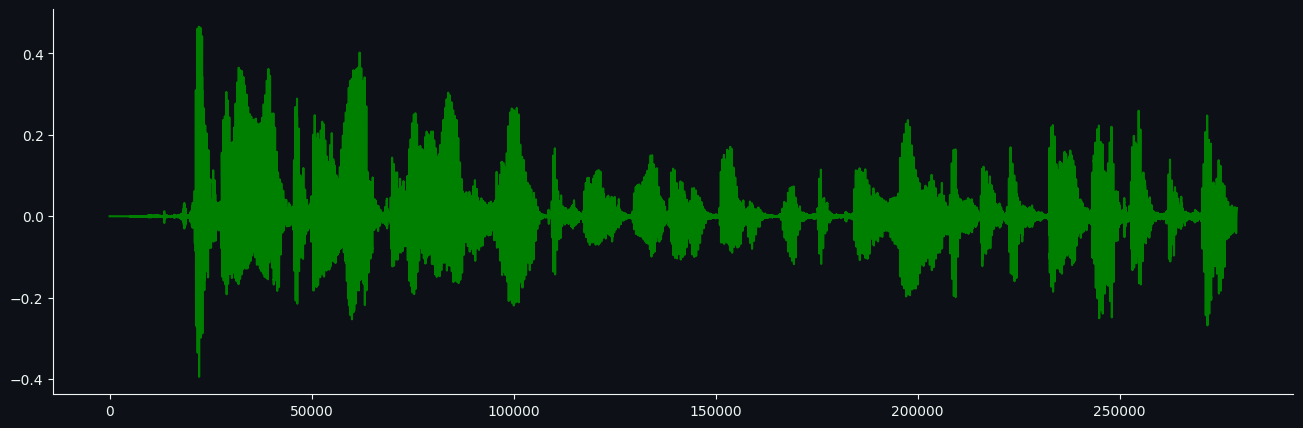

In [243]:
plt.plot(range(len(x)), x)

In [244]:
noise = np.random.normal(0, 1, len(x))

noise2 = signal.lfilter(np.array([1, -1]), 1, noise) # ФВЧ

In [245]:
sound_noise = x + noise
# sound_noise = signal.lfilter(np.array([1, 1]), 1, sound_noise)

In [246]:
ipd.Audio(sound_noise, rate = Fs) # здесь x только моно

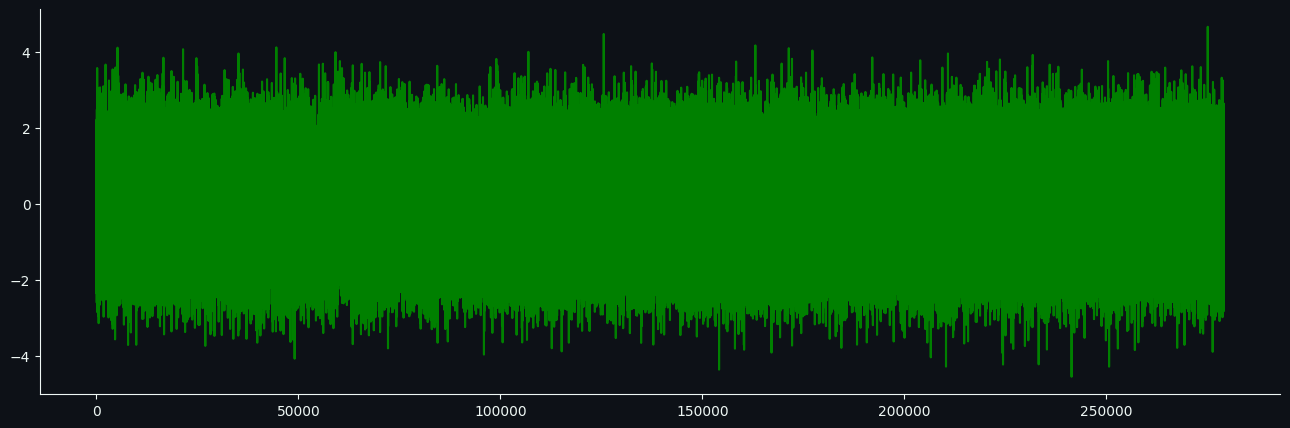

In [247]:
plt.plot(range(len(sound_noise)),sound_noise)

In [248]:
w, e = adaptrls(sound_noise, noise2, 16, 0.98, 1e5)

In [249]:
ipd.Audio(e*10000, rate = Fs) # здесь x только моно

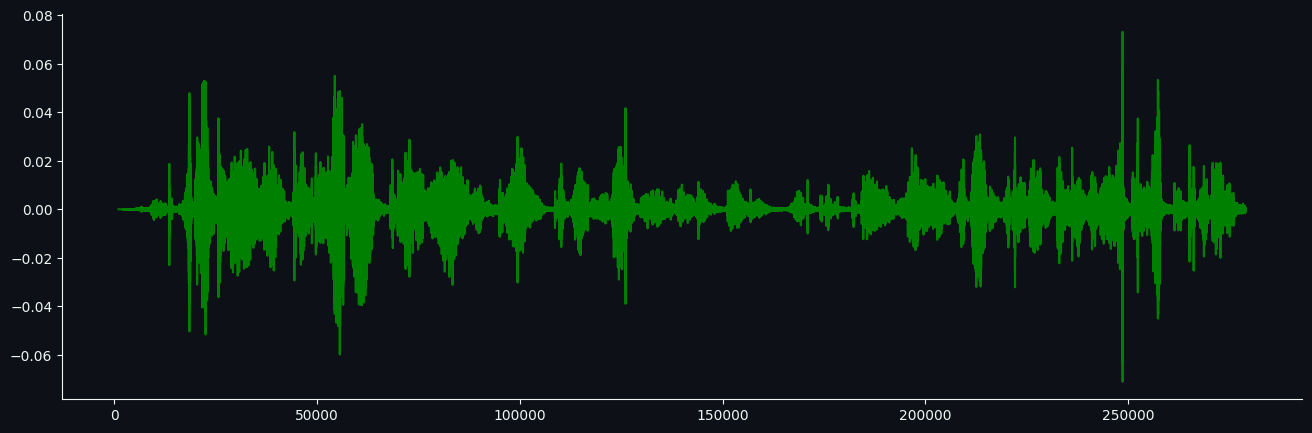

In [250]:
plt.plot(range(1000, len(e)),e[1000:])